# The Multi Tier Framework for measuring energy access in Nepal




As reported by [The MTF survey data ](https://mtfenergyaccess.esmap.org/country/nepal) in 2017, Nepal shows that 71.7% of households have grid access, while 23% have access through off-grid solutions.  Using the MTF definition of access, 93.7% of households nationwide are in Tier 1 or above for access to electricity.

To learn more about energy access in Nepal, download MTF’s Country Diagnostic Report,[here](esmap-mtf-data/Nepal/references/mtf-energy-access-country-diagnostic-report_nepal-9.2019.pdf)

## The structure of the database

- Section A: Household Roster
- Section B: Household Characteristics
- Section C: Supply and Demand of Electricity 
- Section D: Willingness to pay for a grid connection
- Section E: Willingness to pay for improved electricity supply
- Section F: Willingness to pay for solar device
- Section J: Use of cooking Solutions
- Section K: Space and Water heating 
- Section L: Willingness to pay for an improved cookstove
- Section M: Consumption / Expenditure
- Section N: Households Assets : Transport and Agriculture Equipment Ownership and Total
- Section O: Household land ownership and other assets
- Section P: Household economiv shocks
- Section Q: Street Ligthing
- Section R: Time use
- Section S: Health impacts
- Section T: Attitudes
- Section U: Women's empowerment 




Section C contains the informations related to Supply and Demand electricity. 

In [1]:
# Importing necessary libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from IPython.display import Image
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading main dataset into python

main_dataset = pd.read_csv("raw_data/csv/main.csv")
main_dataset.drop('Unnamed: 0', axis = 1, inplace = True)
#main_dataset

# This may not be needed, but decideced to read it
codebook = pd.read_excel('references/codebook.xlsx')


In [3]:
main_dataset.head()


,HHID,Id,Date_HH_Visit,Eco_Reg,Province,Dev_Region,Zone,VDC_MUN,VDC_MUN_NAME,District,...,M32,M33,O1,O2,O2_SO,O2_SO_Recode,O3,O3_con,O4,TIME_END_VISIT1
0,110148801,2cd3defe83504f3593c43b93509a4c9f,2017-11-11,1,1,1,1,1,Khewang,1,...,8000.0,5000.0,1,1.0,NaN,NaN,8.0,0.406990,1200000.0,2017-11-11T02:49:33Z
1,110148802,d85646020ba744eb9b1b4bf76ca4e454,2017-11-11,1,1,1,1,1,Khewang,1,...,0.0,0.0,1,1.0,NaN,NaN,15.0,0.763106,2000000.0,2017-11-11T04:04:27Z
2,110148803,d8612908fadc4ba58c01a706a7e5ef64,2017-11-11,1,1,1,1,1,Khewang,1,...,15000.0,10000.0,1,1.0,NaN,NaN,9.0,0.457863,1350000.0,2017-11-11T04:47:09Z
3,110148804,9157d2376525473f925444bf756cdbe7,2017-11-11,1,1,1,1,1,Khewang,1,...,0.0,0.0,1,1.0,NaN,NaN,8.0,0.406990,1000000.0,2017-11-11T05:41:59Z
4,110148805,b84e1ea7a450429c8a90de5f2a42fe4b,2017-11-11,1,1,1,1,1,Khewang,1,...,0.0,0.0,1,1.0,NaN,NaN,5.0,0.254369,600000.0,2017-11-11T07:00:32Z


In [4]:
# Exploring the shape and columns names of the dataset

print(main_dataset.shape)
print(main_dataset.columns)

column_names = main_dataset.columns
household_info_columns = column_names[:19]
# electricity_df[household_info_columns].head()

(6000, 1247)
Index(['HHID', 'Id', 'Date_HH_Visit', 'Eco_Reg', 'Province', 'Dev_Region',
       'Zone', 'VDC_MUN', 'VDC_MUN_NAME', 'District',
       ...
       'M32', 'M33', 'O1', 'O2', 'O2_SO', 'O2_SO_Recode', 'O3', 'O3_con', 'O4',
       'TIME_END_VISIT1'],
      dtype='object', length=1247)


## section c creation from the main dataset
The section c relates to electricity access in Nepal

In [5]:
# Forming new dataframe of section C

c_section = [column for column in column_names if column.startswith('C')]
type(c_section)
c_section[4:]
c_section.sort()

c_section
target_columns = list(itertools.chain(household_info_columns ,c_section))
electricity_df = main_dataset[target_columns]
electricity_df.head()




,HHID,Id,Date_HH_Visit,Eco_Reg,Province,Dev_Region,Zone,VDC_MUN,VDC_MUN_NAME,District,...,C97,C98,C99,C9_A,CF_F,CF_Stove,CONSENT,C_AVAILABLE,C_DATE_TIME,C_WHO
0,110148801,2cd3defe83504f3593c43b93509a4c9f,2017-11-11,1,1,1,1,1,Khewang,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,0
1,110148802,d85646020ba744eb9b1b4bf76ca4e454,2017-11-11,1,1,1,1,1,Khewang,1,...,NaN,NaN,NaN,NaN,NaN,3000.0,1,1,NaN,0
2,110148803,d8612908fadc4ba58c01a706a7e5ef64,2017-11-11,1,1,1,1,1,Khewang,1,...,NaN,NaN,NaN,NaN,NaN,1500.0,1,1,NaN,0
3,110148804,9157d2376525473f925444bf756cdbe7,2017-11-11,1,1,1,1,1,Khewang,1,...,NaN,NaN,NaN,NaN,NaN,5000.0,1,1,NaN,0
4,110148805,b84e1ea7a450429c8a90de5f2a42fe4b,2017-11-11,1,1,1,1,1,Khewang,1,...,NaN,NaN,NaN,NaN,NaN,1500.0,1,1,NaN,0


# Access to Electricity using Binary method (Nepal)
Section C starts from C2 to C182 column from the main_dataset.  

For Further analysis Specific column will be selected from the main dataset dataframe.

## Connection to the national grid 
From **C2.Is the household connected to the national grid? ** 

1: Yes  ,  2: No 

In [6]:

grid_connection_column = main_dataset["C2"]

grid_connection_column.replace({1:'grid Connected',2:'Not grid Connected'}, inplace=True)
perc_grid_connection = (grid_connection_column.value_counts(normalize = True)*100)
perc_grid_connection



grid Connected        67.45
Not grid Connected    32.55
Name: C2, dtype: float64

In [7]:
# labels = "National Grid Connection",  "Not Connected to the grid"
# explode = (0.1, 0.01) 
# fig1, ax1 = plt.subplots()
# ax1.pie(Perc_Grid_connection, explode=explode, labels=labels, autopct='%1.0f%%',shadow=True, startangle=90)
# ax1.axis('equal')
# #ax1.title("Nepal Grid connection ")
# ax1.set_title("Nepal Grid connection")
# plt.show()

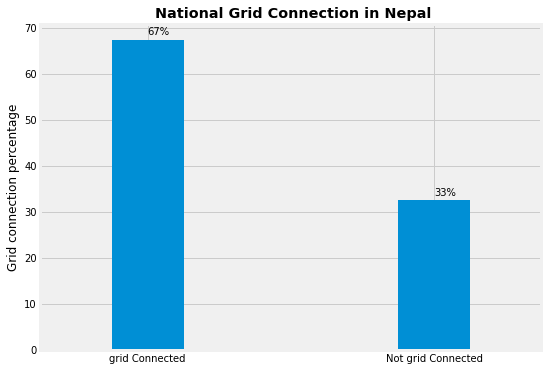

In [8]:

perc_grid_connection.plot(kind = 'bar',width = 0.25,figsize=(8,6))
plt.xticks(rotation=0)
plt.title(" National Grid Connection in Nepal",fontweight='bold')
plt.ylabel('Grid connection percentage')

for index, value in enumerate(perc_grid_connection.values):
    plt.text(index,value+1, f'{value:.0f}%');


### Observation from  Nepal  national grid connection  bar graph
From the mtf Nepal energy access, the report claims that 71.1% and 23% households are and not  connected to the national grid respectively. However by looking on the above pie chart from the raw data,  67% households are connected to the national grid, while 33% are not not connected to the  grid 

### main services for the grid connection 


From C7.Who is the service provider of the grid connection: 

- 01: Nepal Electricity Authority(NEA)
- 02: Other Private Electricity Providers

In [9]:
service_provider = electricity_df['C7']


# #service_provider_def = service_provider.to_frame()
service_provider.fillna(0, inplace = True)
service_provider.replace({1:'Nepal Electricity Authority',0: 'No response',2:' Private Electricity Providers'}, inplace=True)
service_provider_perc = (service_provider.value_counts(normalize = True)*100)
service_provider_perc

Nepal Electricity Authority       67.116667
No response                       32.550000
 Private Electricity Providers     0.333333
Name: C7, dtype: float64

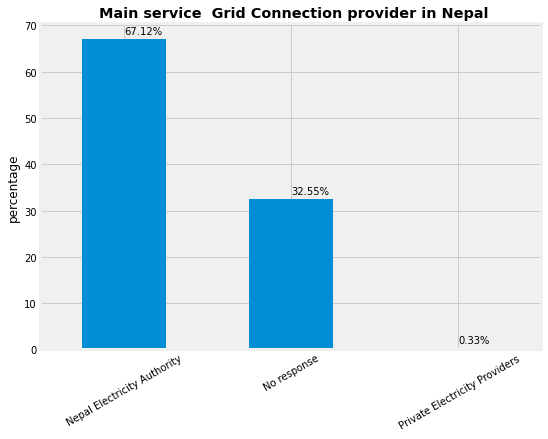

In [10]:


# Visualizing the main service provide in Nepal

service_provider_perc.plot(kind = 'bar',width = 0.5,figsize=(8,6))
plt.xticks(rotation=30)
plt.title(" Main service  Grid Connection provider in Nepal",fontweight='bold')
plt.ylabel('percentage')

for index, value in enumerate(service_provider_perc.values):
    plt.text(index,value+1, f'{value:.2f}%');

67.12% of the households  connected to the national grid pay to the Nepal Electricity Authorithy (NEA) and few households are connected to private service provider which accounts for 0.33%. However 32% did nm't respond to the question.



### Reasons households not connected to the grid 
C4. What is the main reason why your household is not connected to the grid? 
- 001 : Grid is too far from household/not available
- 002 : Cost of initial connection is too expensive
- 003: Monthly fee is too expensive
- 004: Satisfied with current energy solution 
- 005: Renting, Landlord decision
- 006: Service Unreliable
- 007: Administrative procedure is too complicated
- 008: Submitted application and waiting for connection
- 009: Company refused to connect the household
- 555: Other, specify



In [11]:
reason_no_grid_connection =  electricity_df["C4"]
reason_no_grid_connection.dropna(inplace = True)
reason_no_grid_connection.isnull().sum()
perc_reason_no_grid_connection = (reason_no_grid_connection.value_counts(normalize = True)*100)
perc_reason_no_grid_connection

1.0      69.687660
2.0       9.011777
7.0       8.653354
8.0       4.557092
4.0       3.942652
555.0     1.689708
6.0       1.280082
3.0       0.512033
9.0       0.409626
5.0       0.256016
Name: C4, dtype: float64

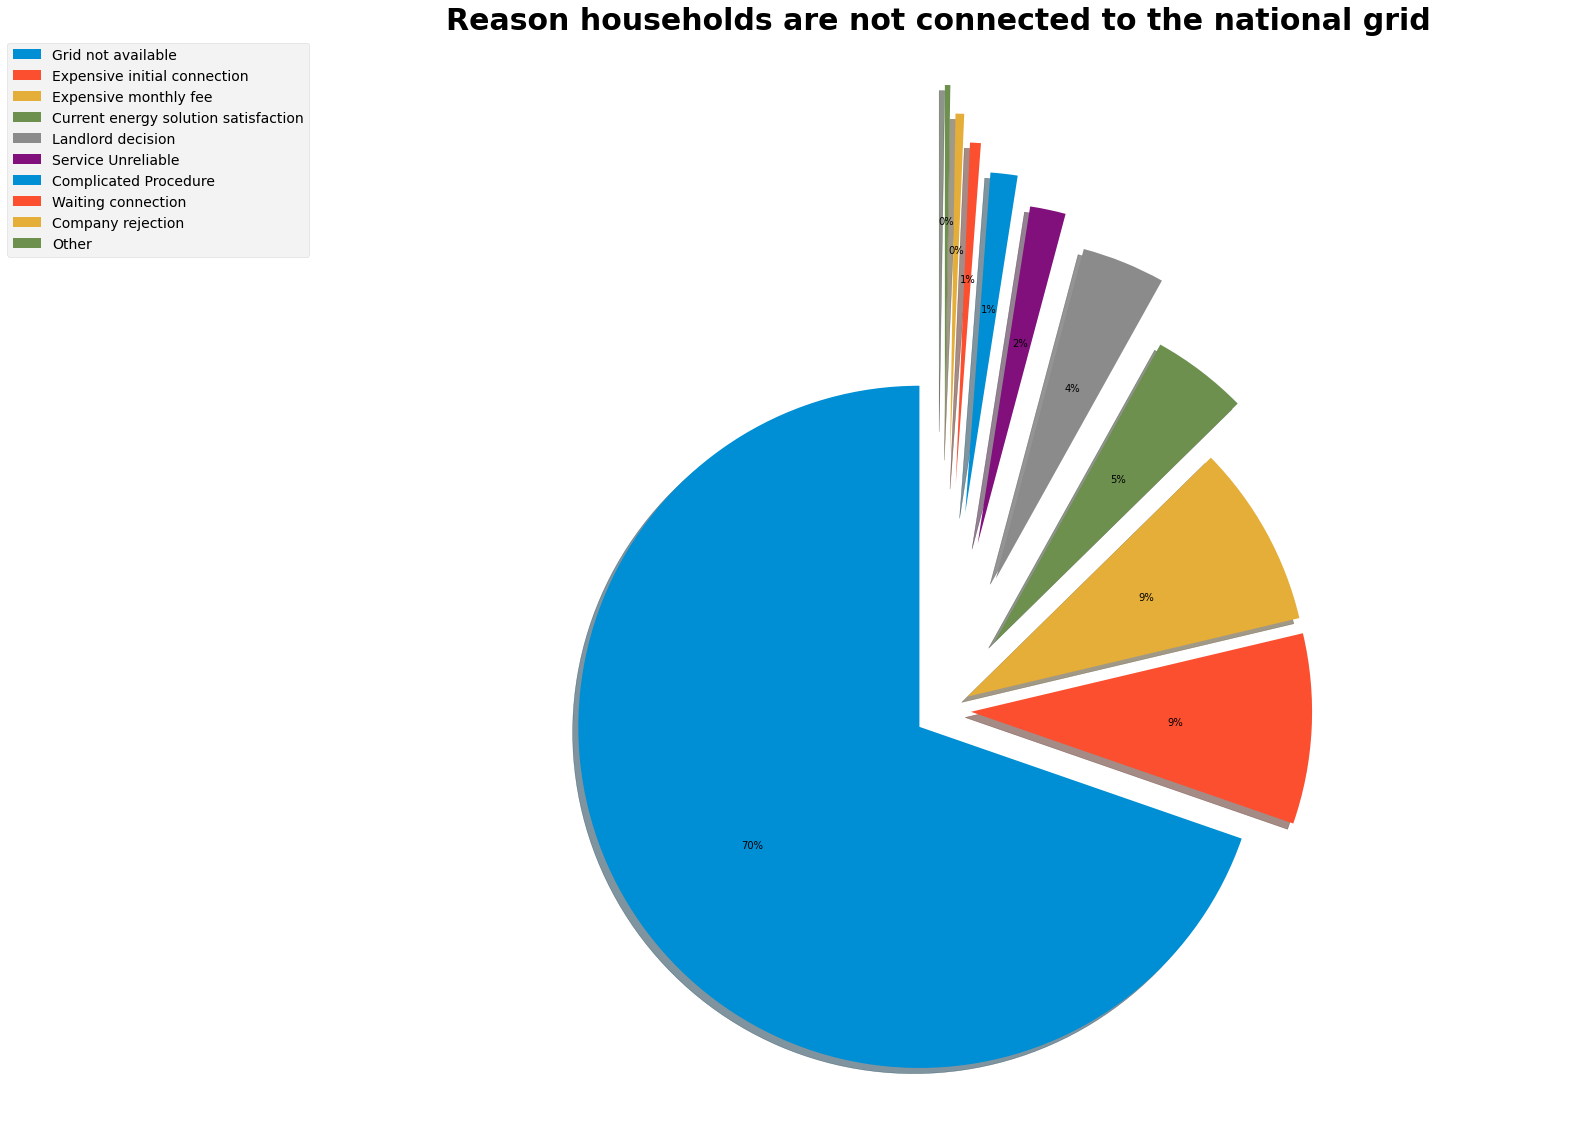

In [12]:
#Visualizing the reasons why households are not connected to the grid 

labels ="Grid not available","Expensive initial connection","Expensive monthly fee","Current energy solution satisfaction","Landlord decision","Service Unreliable","Complicated Procedure","Waiting connection","Company rejection","Other"

explode = (0.1,0.1,0.1,0.3,0.5,0.6,0.7,0.8,0.9,1) 
fig1, ax1 = plt.subplots(figsize=(20,20))
patches, texts, auto = ax1.pie(perc_reason_no_grid_connection, explode=explode, autopct='%1.0f%%',shadow=True, startangle=90,radius=1.2)

#patches, texts, auto = ax1.pie(Perc_reason_no_grid_connection, shadow=True, startangle=90,explode=explode, autopct='%1.1f%%' )
 
plt.legend(patches, labels,loc="left center",bbox_to_anchor=(-0.001, 1.),fontsize=14)
#ax1.title("Nepal Grid connection ")
ax1.axis('equal')
ax1.set_title("Reason households are not connected to the national grid ",fontweight='bold',fontsize=30)
plt.show()


#ax = Perc_reason_no_grid_connection.plot.bar(rot= 30)


From the above pie chart, 70% households were not connected to the grid due to its unavailability. 

### Main source of electricity nationawide
The question C175 specify the main source of households'electricity.
From the report page 38 96


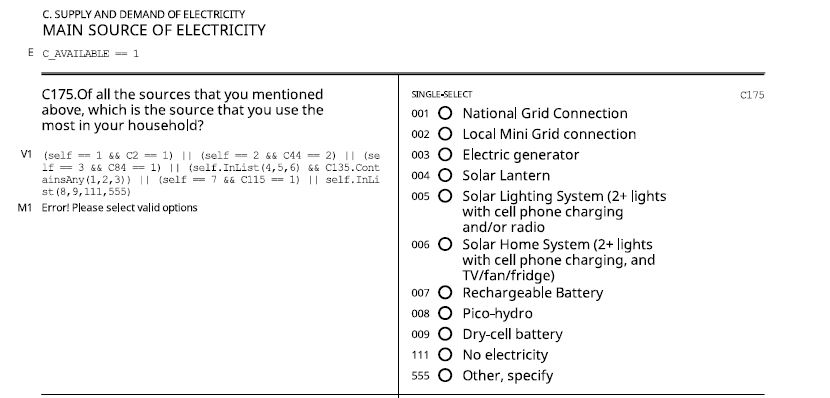

In [13]:
Image('references/MainSource_electricity_Nepal.JPG')

In [14]:



main_source_electricity = electricity_df["C175"]

# Column name renaming 
main_source_electricity.replace({1:'National Grid', 2:'Local mini grid',3:'Electric generator',4:'Solar lantern',5:'Solar Lighting',
                                6:'Solar Home System',7:'Rechargeable Battery',8:'Pico-hydro',9:'Dry cell battery',111:'No electricity',555:'Other'}, inplace=True)

#(len(main_source_electricity[main_source_electricity ==555])/6000 )*100    Percentage for people who answered other
# main_source_electricity.isnull().sum()
# There are non Nan values in this series
perc_main_electricity_source = (main_source_electricity.value_counts(normalize = True)*100)
perc_main_electricity_source





National Grid           67.450000
Solar Lighting          12.100000
Local mini grid         11.266667
No electricity           3.283333
Pico-hydro               2.316667
Dry cell battery         1.733333
Solar lantern            0.850000
Other                    0.666667
Solar Home System        0.266667
Rechargeable Battery     0.066667
Name: C175, dtype: float64

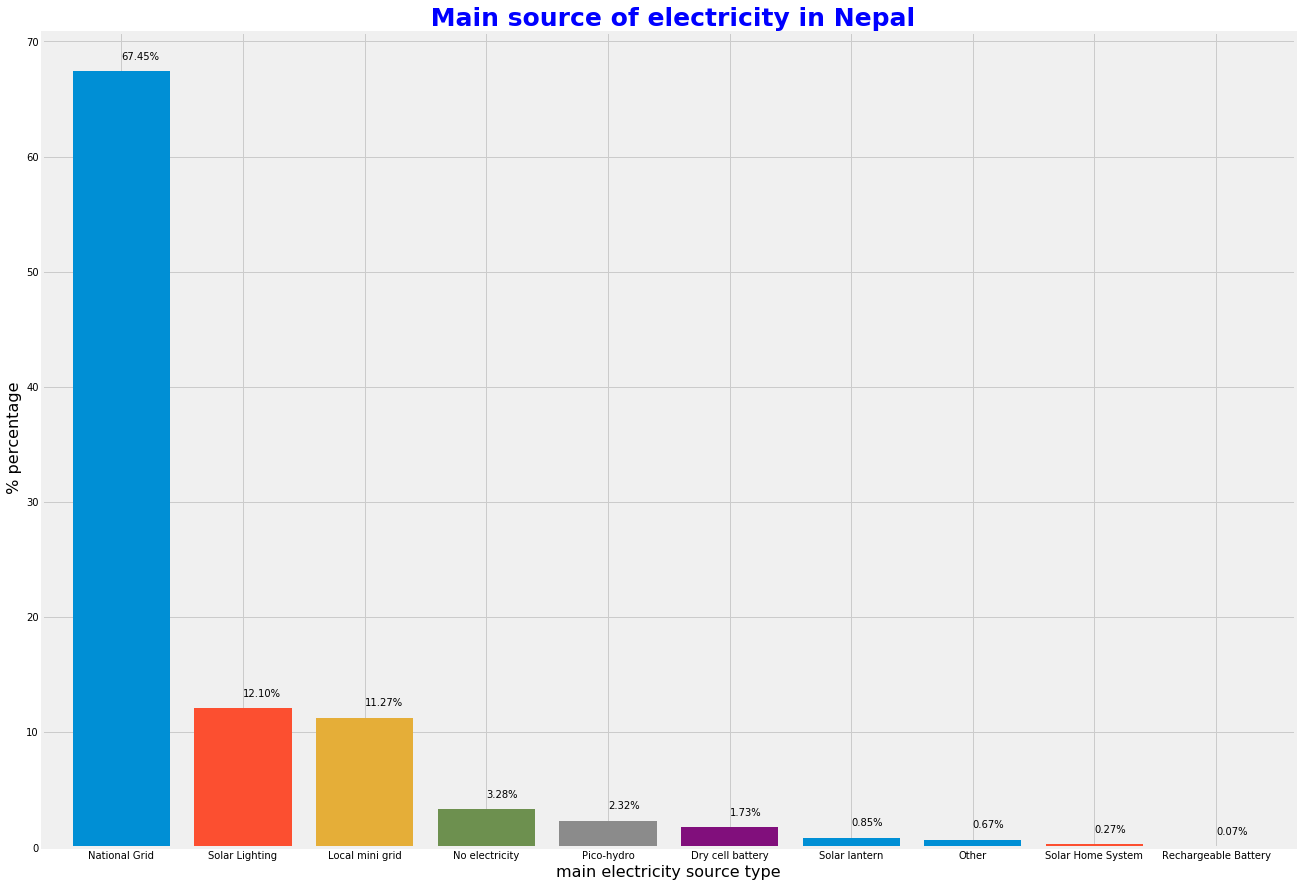

In [15]:
#Visualizing main source data 
perc_main_electricity_source.plot(kind = 'bar',width = 0.8,figsize=(20,15))
plt.xticks(rotation=0)
plt.title(" Main source of electricity in Nepal",fontweight='bold',fontsize=25,color='blue')
plt.ylabel(' % percentage',fontsize=16)
plt.xlabel('main electricity source type',fontsize = 16)

for index, value in enumerate(perc_main_electricity_source.values):
    plt.text(index,value+1, f'{value:.2f}%');


In [16]:
#Off connection this include solar Mini grid, Solar lighting , solar lantern , solar home system and Recheargeable battery
off_grid_perc = perc_main_electricity_source['Solar Lighting'] + perc_main_electricity_source['Solar lantern'] + perc_main_electricity_source['Solar Home System'] + perc_main_electricity_source['Rechargeable Battery'] + perc_main_electricity_source['Local mini grid'] 
np.ceil(off_grid_perc) 

# from raw data, The off grid system is 25%

25.0

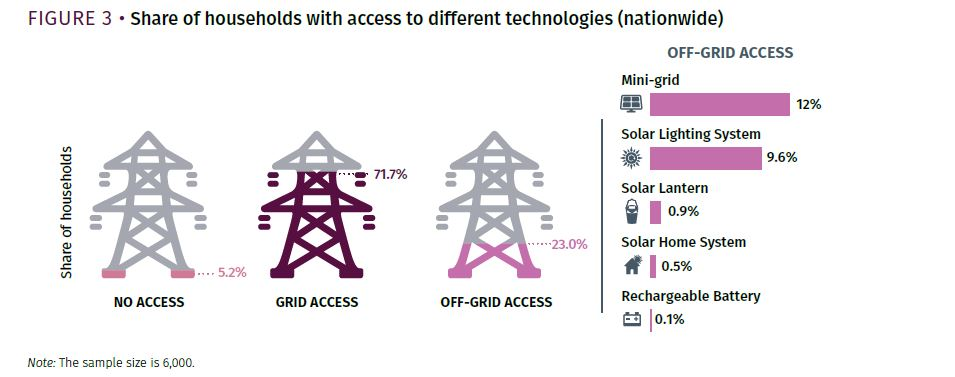

In [17]:
Image('references/main_source_electricity_Report.JPG')


### Most serious problem with the grid

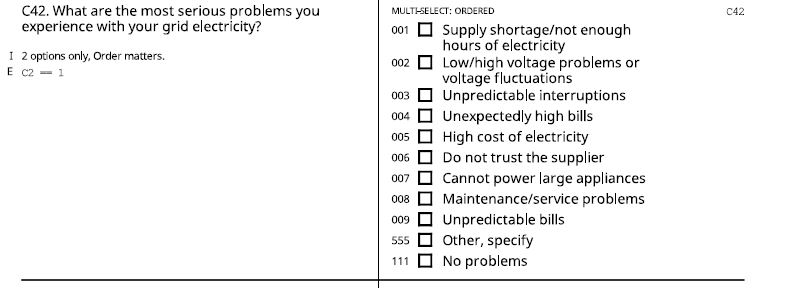

In [18]:
Image('references/grid_connectionproblems_Nepal.JPG')

In [19]:


grid_Problem_respone_colmns  = [column for column in c_section if column.startswith('C42')]
grid_connection_problems = electricity_df[grid_Problem_respone_colmns]
grid_connection_problems1 = grid_connection_problems.copy()

grid_connection_problems1.head()


,C42_SO,C42_SO_Recode,C42__1,C42__111,C42__2,C42__3,C42__4,C42__5,C42__555,C42__6,C42__7,C42__8,C42__9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
grid_connection_challenges = grid_connection_problems1.drop(grid_connection_problems1.columns[0:2],axis=1)
grid_connection_challenges.fillna(0,inplace = True)
grid_connection_challenges.tail()





,C42__1,C42__111,C42__2,C42__3,C42__4,C42__5,C42__555,C42__6,C42__7,C42__8,C42__9
5995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5998,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5999,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
columns_mapping = {'C42__1':'supply shortage','C42__111':'No problems','C42__2':'Voltage fluctuations','C42__3':'Interruption','C42__4':'Unexpected high bills',
                   'C42__5':'High electricity cost',
                  'C42__555':'Other','C42__6':'not trust supplier','C42__7':'not power large appliances','C42__8':'service issues',
                  'C42__9':'Unpredictable bills'}

grid_connection_challenges = grid_connection_challenges.rename(columns = columns_mapping)

grid_connection_challenges.head()

,supply shortage,No problems,Voltage fluctuations,Interruption,Unexpected high bills,High electricity cost,Other,not trust supplier,not power large appliances,service issues,Unpredictable bills
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:

grid_connection_challenges = (grid_connection_challenges.sum()*100/6000).to_frame().reset_index().rename(columns = {'index':'Grid problems', 0:'% Population'})

In [23]:

grid_connection_challenges['% Population'] = grid_connection_challenges['% Population'].apply(lambda x: round(x,1))
grid_connection_challenges.head()

,Grid problems,% Population
0,supply shortage,25.3
1,No problems,6.7
2,Voltage fluctuations,48.1
3,Interruption,40.1
4,Unexpected high bills,5.5


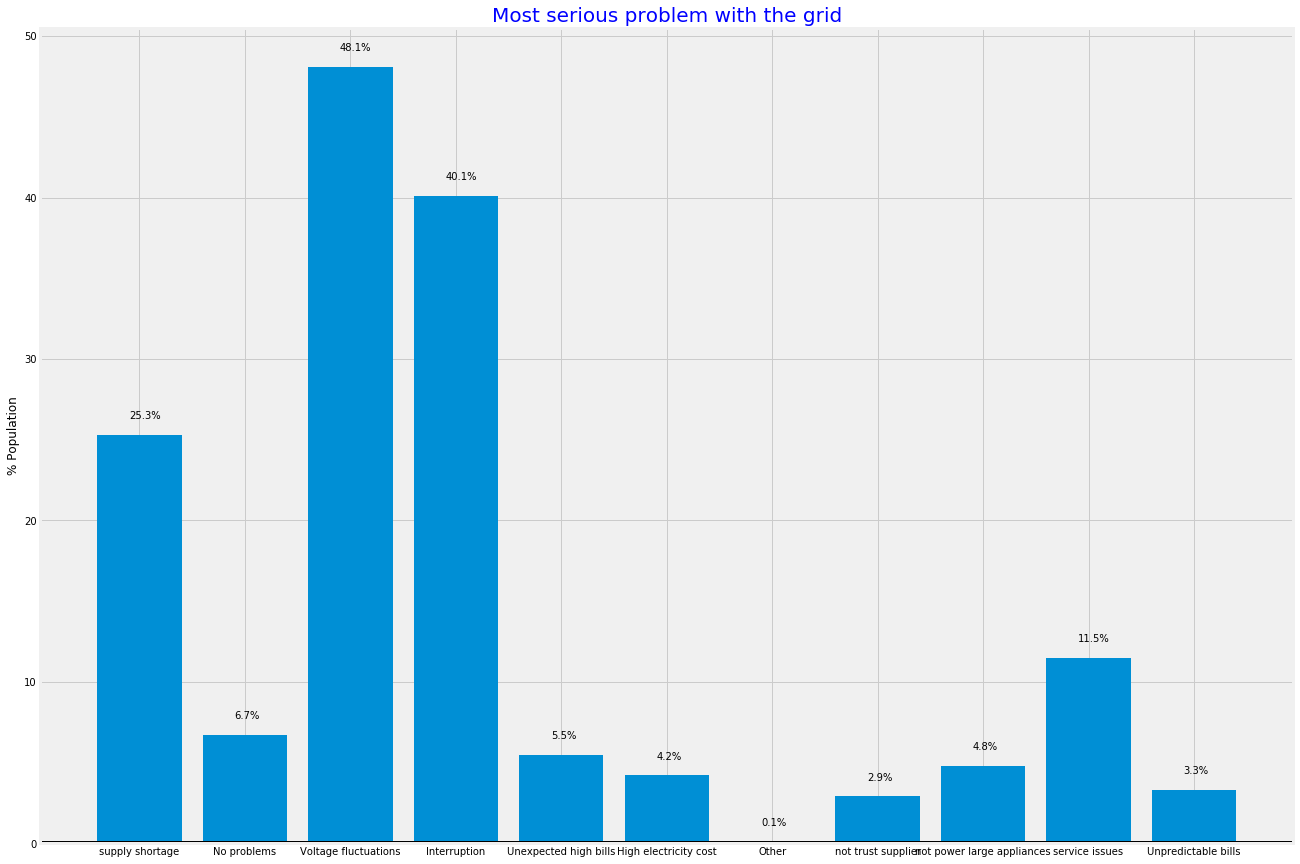

In [24]:
# Visualizing the above information 
plt.figure(figsize = (20,15))
plt.bar(grid_connection_challenges['Grid problems'], grid_connection_challenges['% Population']);
plt.axhline(0, color = 'black')
plt.title('Most serious problem with the grid',fontsize = 20,color = 'blue')
plt.ylabel('% Population')
#plt.xlabel('')
for i,pop in enumerate(grid_connection_challenges['% Population']):
    plt.text(i-0.1,pop+1, f'{pop}%')

Most serious problem from ESMAP report

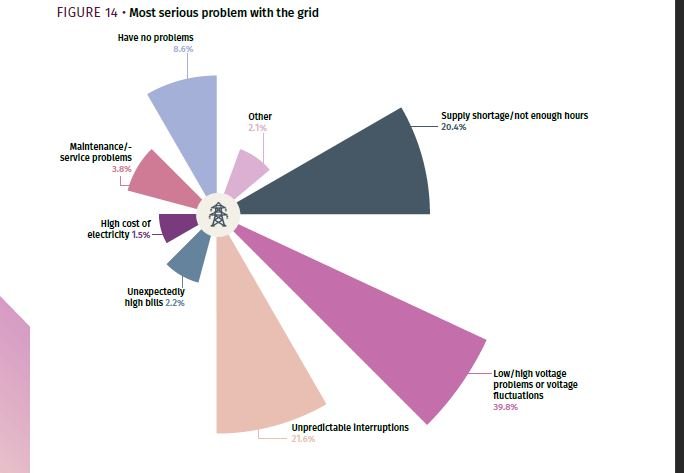

In [25]:
Image('references/most_serious_grid_problem.JPG')

### Access to Electricity through Multi Tier Framework analysis (Nepal)

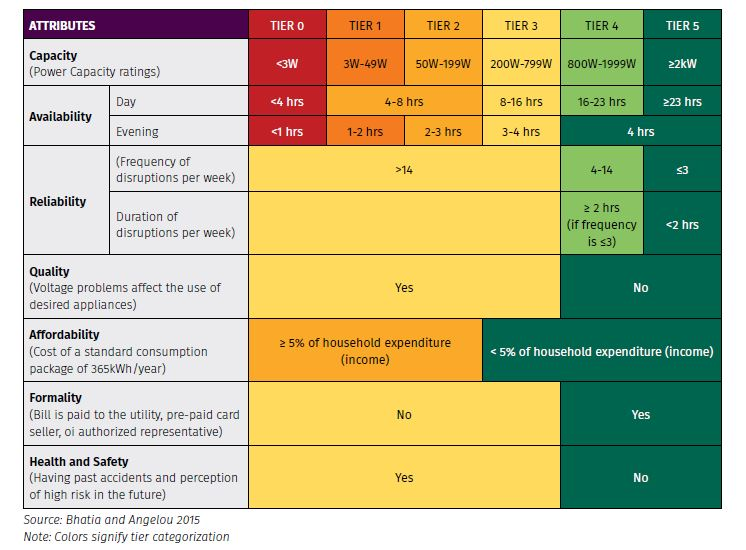

In [26]:
Image("references/MTF_Criteria_Nepal.JPG")

#### Rule for aggregating the households'MTF: 

A household’s aggregate tier allocation is based on its performance across the seven attributes
measuring access, and the lowest tier level among the attributes is considered its final aggregate tier.

#### Availability of electricity according to main source of electricity

This section examined Whole day and evening availability for typical month from the belo main source :
- National grid
- Mini grid
- Generator
- Rechargeable battery 
- pico 
- Solar based devices



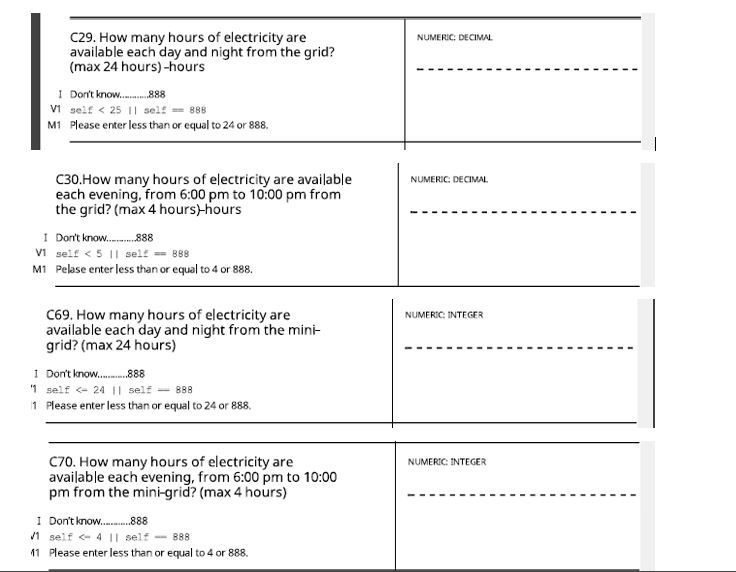

In [27]:
Image("references/availability_questions1.JPG")

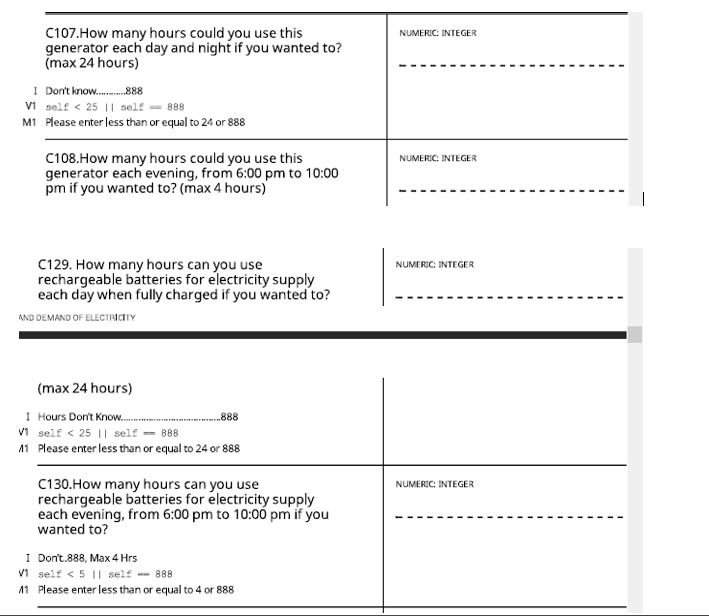

In [28]:
Image("references/availability_questions2.JPG")

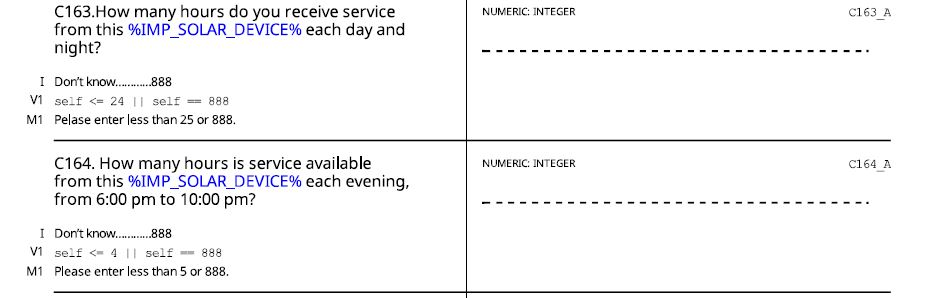

In [29]:
Image("references/solar_reliability_questions.JPG")

In [30]:
# main_dataset["C29_A"].value_counts(dropna=False)
# datframe = electricity_df[["HHID", "C29_A","C30_A,C"]]
y =  [column for column in  main_dataset.columns if column.startswith('C')]
#y
# Why all data are NANs?

In [31]:
# Dataframe with availability information
avialability_df = electricity_df[["HHID","C29_A","C30_A","C69_A","C70_A","C107_A","C108_A","C129","C130", "C163_A","C164_A"]]
avialability_df.isnull().sum()
# checking the number of availabilty from miniigrid
#len(avialability_df[avialability_df['C69_A'].notnull()])


HHID         0
C29_A     4457
C30_A     4457
C69_A     5495
C70_A     5495
C107_A    6000
C108_A    6000
C129      5996
C130      5996
C163_A    5554
C164_A    5554
dtype: int64


I have decided to keep the missing data for the accuracy of data analysis.
Many missing values from generator so let's drop its columns 


In [32]:
#dropping generator information because they are all missing
avialability_df.drop(['C107_A','C108_A'],axis =1,inplace = True)


In [33]:
#AMapping title for the availability dataset 
avialability_df.rename(columns = {'C29_A':'grid_Avail_wholeday', 'C30_A': 'grid_Avail_evening', 'C69_A':'minigrid_avail_wholeday','C70_A':'mini_grid_evening',
                                 'C129':'recharBattery_avail_wholeday','C130':'recharBattery_avail_evening','C163_A': 'solar_avail_wholeday',
                                 'C164_A':'solar_avail_evening'},inplace = True)
                       
#avialability_df.isnull().sum()
# Few missing values are left,but let's keep them for better analysis
avialability_df.head()


,HHID,grid_Avail_wholeday,grid_Avail_evening,minigrid_avail_wholeday,mini_grid_evening,recharBattery_avail_wholeday,recharBattery_avail_evening,solar_avail_wholeday,solar_avail_evening
0,110148801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,110148802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,110148803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,110148804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,110148805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Dropping  columns with missing values
# avialability_df.drop(['C69_A','C70_A','C107_A','C108_A','C129','C130'],axis =1,inplace = True)
# avialability_df.rename(columns = {'C29_A':'Availability _ Day and night', 'C30_A': 'Availability evening'}, inplace = True)
# avialability_df.head()

#avialability_df[(avialability_df["grid_Avail_wholeday"]> 23) | (avialability_df["minigrid_avail_wholeday"] > 23) | (avialability_df["recharBattery_avail_wholeday"] > 23)]

In [35]:
#avialability_df[avialability_df['Availability _ Day and night']==3]

# From the results they are n't value less than 4

In [36]:
# Tier for availability the whole day 

def find_tier(household_row):
#     """
#     Returns the availability tier of a household after comparing with MTF availability attribute national wide.
#     """
    grid = household_row['grid_Avail_wholeday']
    minigrid = household_row["minigrid_avail_wholeday"]
    battery = household_row['recharBattery_avail_wholeday']
    solar = household_row['solar_avail_wholeday']
   
    if ( grid < 4) or (  minigrid < 4) or (battery < 4)or (solar < 4) :
        return 'Tier 0'
    
    elif (grid > 4 and grid < 8) or (minigrid > 4 and minigrid < 8) or (battery > 4 and battery < 8) or (solar > 4 and solar < 8):
        return 'Tier 2'
    
    elif (grid > 8  and grid < 16) or(minigrid > 8 and minigrid < 16) or (battery > 8 and battery < 16) or (solar > 8 and solar < 16):
        return 'Tier 3'
    
    elif (grid > 16 and grid < 23) or (minigrid > 16 and minigrid < 23) or (battery > 16 and battery < 23) or (solar > 16 and solar < 23):
        return 'Tier 4'
    
    elif (grid >= 23 and grid < 888.0) or (minigrid >= 23 and minigrid < 888.0) or (battery >= 23 and battery < 888.0) or (solar >= 23 and solar < 888.0):
        return 'Tier 5'
    
    else:
        return 'Unknown'
    
    


In [37]:
# Availability in the evening 

def find_tier2(household_row):
    
    grid2 = household_row['grid_Avail_evening']
    minigrid2 = household_row["mini_grid_evening"]
    battery2 = household_row['recharBattery_avail_evening']
    solar2 = household_row['solar_avail_evening']
    
    if (grid2 < 1) or (minigrid2 < 1) or (battery2 < 1) or (solar2 < 1):
        
        return 'Tier 0'
    elif (grid2 > 1 and grid2 < 2) or (minigrid2 > 1 and minigrid2 < 2) or (battery2 < 1 and battery2 > 2) or (solar2 < 1 and solar2 > 2):
        
        return 'Tier 1'
    elif (grid2 > 2 and grid2 < 3) or (minigrid2 > 2 and minigrid2 > 3) or (battery2 > 2 and battery2 < 3) or (solar2 > 2 and solar2 < 3):
        
        return 'Tier 2'
    elif (grid2 > 3 and grid2 < 4) or (minigrid2 > 3 and minigrid2 < 4) or (battery2 > 3 and battery2 < 4) or (solar2 > 3 and solar2 < 4):
        
        return 'Tier 3' 
    elif (grid2 >= 4 and grid2 < 888.0 ) or (minigrid2 >= 4 and minigrid2 < 888.0) or (battery2 >= 4 and battery2 <888.0) or (solar2 >=4 and solar2 < 888.0):
        
        return 'Tier 5'
    else:
        
        return 'Unknown'
    

In [38]:
avialability_df['Tier_whole_day'] = avialability_df.apply(find_tier, axis=1)
avialability_df ['Tier_evening'] = avialability_df.apply(find_tier2, axis=1)
#avialability_df.head()
#avialability_df['Tier_whole_day'].value_counts(normalize = True)

In [39]:
# removing unknown data into the sample 
av_wholeday_nationawide = avialability_df[avialability_df["Tier_whole_day"]!= 'Unknown']

av_wholeday_nationawide1 = av_wholeday_nationawide[av_wholeday_nationawide["Tier_evening"]!= 'Unknown'] 
#av_wholeday_nationawide2 = av_wholeday_nationawide1[av_wholeday_nationawide1["Tier_evening"]!= '888.0'] 
#len(av_wholeday_nationawide)
#av_wholeday_nationawide.tail()

In [40]:
# Availability whole day 

avialability_Whole_day_nationwide = av_wholeday_nationawide['Tier_whole_day'].value_counts(normalize=True)*100

av_Whole_day_nationwide_df= avialability_Whole_day_nationwide.to_frame().rename(columns={'Tier_whole_day':'Availability(Day & night)'})
av_Whole_day_nationwide_df_sorted = av_Whole_day_nationwide_df.sort_index()
av_Whole_day_nationwide_df_sorted

,Availability(Day & night)
Tier 0,15.311245
Tier 2,20.230924
Tier 3,28.815261
Tier 4,35.291165
Tier 5,0.351406


In [41]:
#av_wholeday_nationawide1 = avialability_df[avialability_df["Tier_evening"]!= 'Unknown'] 
#av_wholeday_nationawide1

In [42]:
#Availability evening time 
av_evening = av_wholeday_nationawide1['Tier_evening'].value_counts(normalize=True)*100
av_evening_df= av_evening.to_frame().rename(columns={'Tier_evening':'Availability evening'})
av_evening_df_sorted = av_evening_df.sort_index()
av_evening_df_sorted

,Availability evening
Tier 0,19.011407
Tier 1,1.520913
Tier 2,24.714829
Tier 3,0.380228
Tier 5,54.372624


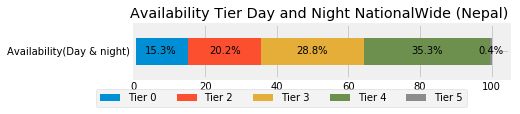

In [43]:
# Plotting
plot = av_Whole_day_nationwide_df_sorted.T.plot(kind='barh', stacked=True, figsize = (6,1))

for bar in plot.patches:
    bar_width = bar.get_width()
    bar_height = bar.get_height()
    x_bar = bar.get_x()
    y_bar = bar.get_y()
    
    label = f'{bar_width:.1f}%'
    x_label = x_bar + bar_width / 2
    y_label = y_bar + bar_height / 2
    plt.text(x_label, y_label, label, va = 'center', ha = 'center')
    
plt.title('Availability Tier Day and Night NationalWide (Nepal) ')
plt.legend(bbox_to_anchor=(0.9,- 0.1), ncol = 5);

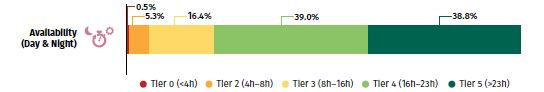

In [44]:
Image("references/availability_day_night_Nepal.JPG")

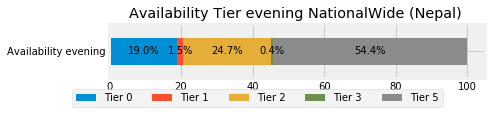

In [45]:
plot = av_evening_df.sort_index().T.plot(kind='barh', stacked=True, figsize = (6,1))

for bar in plot.patches:
    bar_width = bar.get_width()
    bar_height = bar.get_height()
    x_bar = bar.get_x()
    y_bar = bar.get_y()
    
    label = f'{bar_width:.1f}%'
    x_label = x_bar + bar_width / 2
    y_label = y_bar + bar_height / 2
    plt.text(x_label, y_label, label, va = 'center', ha = 'center')
    
plt.title('Availability Tier evening NationalWide (Nepal) ')
plt.legend(bbox_to_anchor=(0.9,- 0.1), ncol = 5);

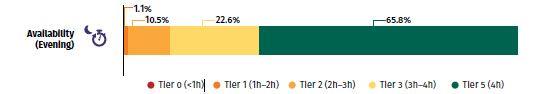

In [46]:
Image("references/evening_availability_nepal.JPG")

### Reliability
Reliability is measured by Frequency of disruptions  per week and Duration of disruptions per week.

Questions related to Reliability are as follows: 

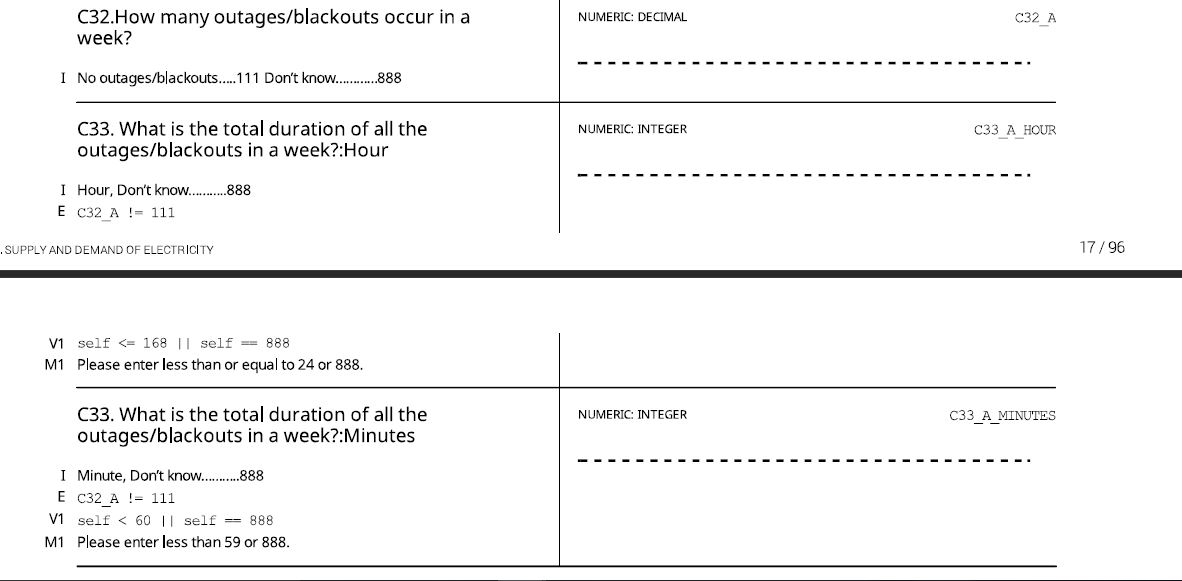

In [47]:

Image('references/Reliability_questions.JPG')

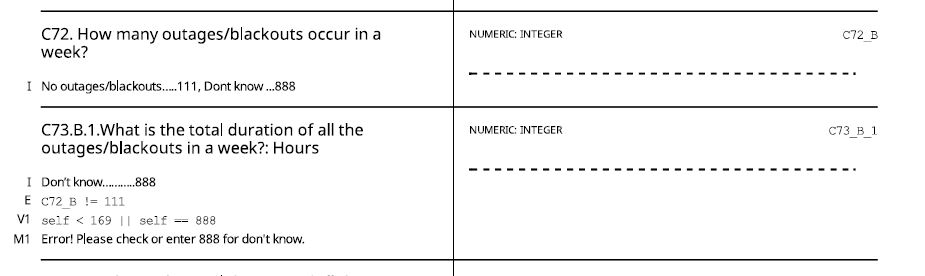

In [48]:
Image('references/minigrid_reliability.JPG')

Other main sources of electricity do not have questions related to outages in section C. Hence only grid and mini grid reliability were assessed in this analysis.

In [49]:
# Forming a datasets related to reliability 

reliability_df = electricity_df[["HHID","C32_A","C33_A_HOUR","C72_B","C73_B_1"]]
reliability_df.isnull().sum()
reliability_df.head()

,HHID,C32_A,C33_A_HOUR,C72_B,C73_B_1
0,110148801,NaN,NaN,111.0,NaN
1,110148802,NaN,NaN,3.0,1.0
2,110148803,NaN,NaN,111.0,NaN
3,110148804,NaN,NaN,3.0,2.0
4,110148805,NaN,NaN,2.0,1.0


In [50]:

# reliability_df1 =reliability_df [reliability_df.C33_A_HOUR.notna()]
# reliability_df1.head()



In [51]:
#Columns mapping or renaming columns 
reliability_df.rename(columns = {'C32_A':'grid_interruption_freq','C33_A_HOUR':'grid_interruption_dur_Hr','C72_B':'minigrid_interruption_freq','C73_B_1':'minigrid_interruption_dur_hr'},inplace = True)

#checking if there are non zero values in minigrid_dur_hr

#reliability_df[reliability_df['minigrid_dur_hr']==0]
#Filling grid_frequency and minigrid_fre NANs valued with 0 since there no zero values already present in those columns

reliability_df[['grid_interruption_freq', 'minigrid_interruption_freq']] = reliability_df[['grid_interruption_freq','minigrid_interruption_freq']].fillna(value=0)
reliability_df.head()


,HHID,grid_interruption_freq,grid_interruption_dur_Hr,minigrid_interruption_freq,minigrid_interruption_dur_hr
0,110148801,0.0,NaN,111.0,NaN
1,110148802,0.0,NaN,3.0,1.0
2,110148803,0.0,NaN,111.0,NaN
3,110148804,0.0,NaN,3.0,2.0
4,110148805,0.0,NaN,2.0,1.0


In [52]:
# a function to computer tier for reliability nationwide the whole day 

def find_tierReliability(household_row):
#     """
#     Returns the availability tier of a household after comparing with MTF availability attribute national wide.
#     """
    grid_freq = household_row['grid_interruption_freq']
    grid_dur = household_row['grid_interruption_dur_Hr']
    minigrid_freq = household_row['minigrid_interruption_freq']
    minigrid_dur = household_row['minigrid_interruption_dur_hr']
    
    if (grid_freq > 14 and grid_freq < 888.0 and grid_freq != 0.0) or (minigrid_freq > 14 and minigrid_freq < 888.0 and minigrid_freq != 0.0):
        return 'Tier 3'
    
    elif (grid_freq > 3 and grid_freq < 14) or ( grid_freq <= 3  and grid_freq != 0.0 and grid_dur > 2) or (minigrid_freq > 3 and minigrid_freq < 14) or (minigrid_freq <= 3 and minigrid_freq!=0.0 and minigrid_dur > 2):
        return 'Tier 4'
    
    elif (grid_freq <= 3 and grid_freq != 0.0 and grid_dur <= 2) or (minigrid_freq <= 3 and minigrid_freq != 0.0 and minigrid_dur <= 2):
        return 'Tier 5'
    
    else:
        return 'unknown_Tier'


In [53]:
reliability_df['Tier_reliablity'] = reliability_df.apply(find_tierReliability, axis=1)
reliability_df.head()

,HHID,grid_interruption_freq,grid_interruption_dur_Hr,minigrid_interruption_freq,minigrid_interruption_dur_hr,Tier_reliablity
0,110148801,0.0,NaN,111.0,NaN,Tier 3
1,110148802,0.0,NaN,3.0,1.0,Tier 5
2,110148803,0.0,NaN,111.0,NaN,Tier 3
3,110148804,0.0,NaN,3.0,2.0,Tier 5
4,110148805,0.0,NaN,2.0,1.0,Tier 5


In [54]:
reliability_df1 = reliability_df[reliability_df["Tier_reliablity"]!= 'unknown_Tier'] 

In [55]:
# reliability time 
reliability_nationwide = reliability_df1['Tier_reliablity'].value_counts(normalize=True)*100
reliability_nationwide_df= reliability_nationwide.to_frame().rename(columns={'Tier_reliablity':'Reliability'})
reliability_nationwide_df_sorted = reliability_nationwide_df.sort_index()
reliability_nationwide_df_sorted


,Reliability
Tier 3,38.679245
Tier 4,49.685535
Tier 5,11.635220


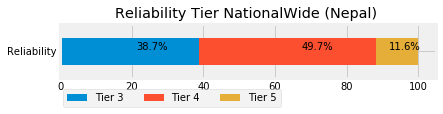

In [56]:
#plotting
plot = reliability_nationwide_df_sorted.T.plot(kind='barh', stacked=True, figsize = (6,1))

for bar in plot.patches:
    bar_width = bar.get_width()
    bar_height = bar.get_height()
    x_bar = bar.get_x()
    y_bar = bar.get_y()
    
    label = f'{bar_width:.1f}%'
    x_label = x_bar + bar_width / 1.5
    y_label = y_bar + bar_height / 1.5
    plt.text(x_label, y_label, label, va = 'center', ha = 'center')
    
plt.title('Reliability Tier NationalWide (Nepal) ')
plt.legend(bbox_to_anchor=(0.6,- 0.1), ncol = 5);


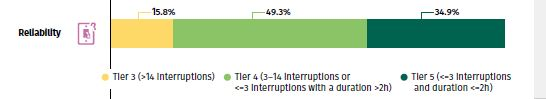

In [57]:
Image("references/reliability_report.JPG")

### HEALTH AND SAFETY



C43, C83, C114, C134, C166 are qestions related to health and safety from the main source of electricity.

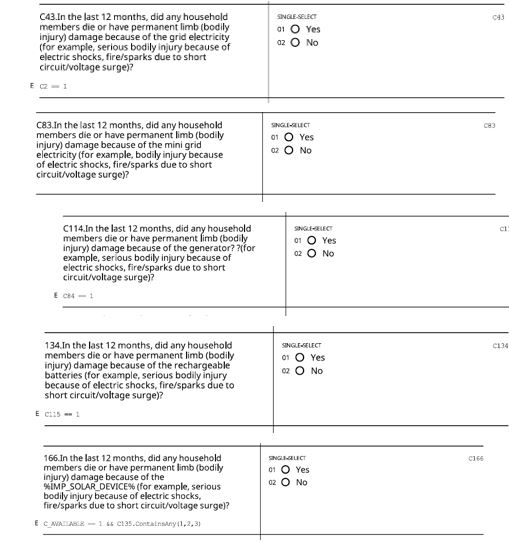

In [61]:
Image("references/health_safety_questions_Nepal.JPG")

In [80]:
# Health and safety dataframe

health_safety_df = electricity_df[["HHID","C43","C83","C114","C134","C166"]]
health_safety_df.isnull().sum()
health_safety_df.head()

,HHID,C43,C83,C114,C134,C166
0,110148801,NaN,2.0,NaN,NaN,NaN
1,110148802,NaN,2.0,NaN,NaN,2.0
2,110148803,NaN,2.0,NaN,NaN,2.0
3,110148804,NaN,2.0,NaN,NaN,NaN
4,110148805,NaN,2.0,NaN,NaN,NaN


In [87]:
#Filling NaN values with Zero to simplify the analysis

health_safety_df.fillna(0,inplace = True)


# Renaming the columns
health_safety_df.rename(columns = {'C43':'grid_safety','C83':'mini_grid_safety','C114':'gen_safety','C134':'battery_safety','C166':'solar_safety'},inplace = True)
health_safety_df.head()

,HHID,grid_safety,mini_grid_safety,gen_safety,battery_safety,solar_safety
0,110148801,0.0,2.0,0.0,0.0,0.0
1,110148802,0.0,2.0,0.0,0.0,2.0
2,110148803,0.0,2.0,0.0,0.0,2.0
3,110148804,0.0,2.0,0.0,0.0,0.0
4,110148805,0.0,2.0,0.0,0.0,0.0


In [93]:
# A function to compute the tier on national level depending on the above main source of electricity

def health_safety_tier(household_row):
    gridsafe = household_row["grid_safety"]
    mngridsafe = household_row["mini_grid_safety"]
    gensafe = household_row["gen_safety"]
    battsafe = household_row["battery_safety"]
    solarsafe = household_row["solar_safety"]
    
    
    if(gridsafe == 1.0) or (mngridsafe == 1.0) or (gensafe == 1.0) or (battsafe == 1.0) or (solarsafe == 1.0):
        return 'Tier 3'
    
    elif(gridsafe == 2.0) or (mngridsafe == 2.0) or (gensafe == 2.0) or (battsafe == 2.0) or (solarsafe == 2.0):
        return 'Tier 5'
    
    else:
        return 'unkownTier'
    

    

In [102]:
# Adding column tier to the health and safety dataframe
health_safety_df['Tier_health_safety'] = health_safety_df.apply(health_safety_tier, axis=1)
len (health_safety_df[health_safety_df['Tier_health_safety'] == 'unkownTier'])

# print(341/6000 *100), they are 341 and they 5.7% Unkwon tier

# Removing unknown Tier from the analysis
health_safety_df1 = health_safety_df[health_safety_df["Tier_health_safety"]!= 'unkownTier'] 


In [104]:
health_safety_nationwide = health_safety_df1['Tier_health_safety'].value_counts(normalize=True)*100
health_safety_nationwide_df= health_safety_nationwide.to_frame().rename(columns={'Tier_health_safety':'Health and Safety'})
health_safety_nationwide_df_sorted = health_safety_nationwide_df.sort_index()
health_safety_nationwide_df_sorted

,Health and Safety
Tier 3,0.477116
Tier 5,99.522884


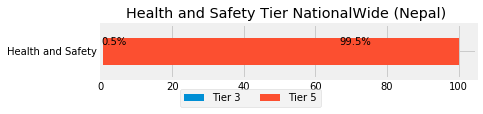

In [119]:
# plotting the health and safety tier 
plot = health_safety_nationwide_df_sorted.T.plot(kind='barh', stacked=True, figsize = (6,1))

for bar in plot.patches:
    bar_width = bar.get_width()
    bar_height = bar.get_height()
    x_bar = bar.get_x()
    y_bar = bar.get_y()
    
    label = f'{bar_width:.1f}%'
    x_label = x_bar + bar_width / 1.5
    y_label = y_bar + bar_height / 1.5
    plt.text(x_label, y_label, label, va = 'bottom', ha = 'left')
    
plt.title('Health and Safety Tier NationalWide (Nepal) ')
plt.legend(bbox_to_anchor=(0.6,- 0.1), ncol = 5);

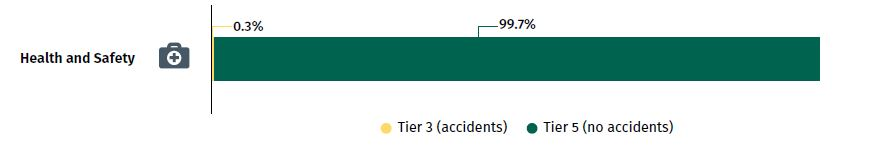

In [120]:
Image('references/healthandsafety_report.JPG')

### Quality 

Grid, Mini-Grid and Generator voltage fluctuation questions are analysed in this section.
However, information from solar based devices and battery recharging are not presents in the raw data.


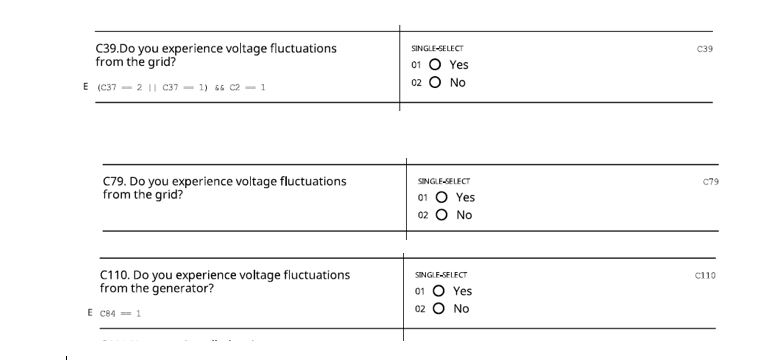

In [130]:
Image('references/quality_questions.jpg')

In [131]:
# Quality datatframe

quality_df = electricity_df[["HHID","C39","C79","C110"]]
quality_df.isnull().sum()

#filling NAN with 0 
quality_df.fillna(0,inplace = True)

quality_df.head()

,HHID,C39,C79,C110
0,110148801,0.0,2.0,0.0
1,110148802,0.0,2.0,0.0
2,110148803,0.0,2.0,0.0
3,110148804,0.0,2.0,0.0
4,110148805,0.0,2.0,0.0


In [133]:
# Renaming the columns
quality_df.rename(columns = {'C39':'grid_quality','C79':'mini_grid_quality','C110':'gen_quality'},inplace = True)
quality_df.head()


,HHID,grid_quality,mini_grid_quality,gen_quality
0,110148801,0.0,2.0,0.0
1,110148802,0.0,2.0,0.0
2,110148803,0.0,2.0,0.0
3,110148804,0.0,2.0,0.0
4,110148805,0.0,2.0,0.0


In [135]:
# A function to compute the tier on national level depending on the above main source of electricity

def quality_tier(household_row):
    gridqua = household_row["grid_quality"]
    mngridqua = household_row["mini_grid_quality"]
    genqua = household_row["gen_quality"]

    
    
    if(gridqua == 1.0) or (mngridqua == 1.0) or (genqua == 1.0):
        return 'Tier 3'
    
    elif(gridqua == 2.0) or (mngridqua == 2.0) or (genqua == 2.0):
        return 'Tier 5'
    
    else:
        return 'unkownTier'
    

In [139]:
# Adding column tier to the health and safety dataframe
quality_df['Tier_quality'] = quality_df.apply(quality_tier, axis=1)

# Removing unknown Tier from the analysis
quality_df1 = quality_df[quality_df["Tier_quality"]!= 'unkownTier'] 


In [140]:
quality_nationwide = quality_df1['Tier_quality'].value_counts(normalize=True)*100
quality_nationwide_df= quality_nationwide.to_frame().rename(columns={'Tier_quality':'Quality'})
quality_nationwide_df_sorted = quality_nationwide_df.sort_index()
quality_nationwide_df_sorted

,Quality
Tier 3,73.556106
Tier 5,26.443894


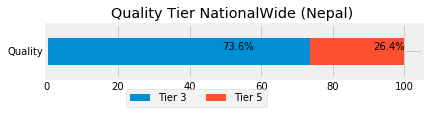

In [144]:
# plotting the quality tier 
plot = quality_nationwide_df_sorted.T.plot(kind='barh', stacked=True, figsize = (6,1))

for bar in plot.patches:
    bar_width = bar.get_width()
    bar_height = bar.get_height()
    x_bar = bar.get_x()
    y_bar = bar.get_y()
    
    label = f'{bar_width:.1f}%'
    x_label = x_bar + bar_width / 1.5
    y_label = y_bar + bar_height / 1.5
    plt.text(x_label, y_label, label, va = 'center', ha = 'left')
    
plt.title('Quality Tier NationalWide (Nepal) ')
plt.legend(bbox_to_anchor=(0.6,- 0.1), ncol = 5);

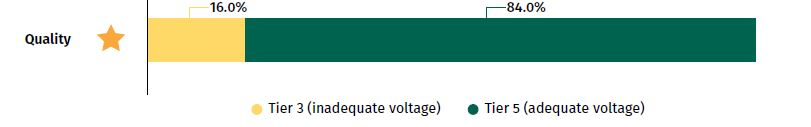

In [145]:
Image('references/quality_report.JPG')